## Estimation of obesity levels based on eating habits and physical condition Data Set

#### This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import warnings
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [22]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.shape

(2111, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [17]:
df.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["family_history_with_overweight"]=label_encoder.fit_transform(df["family_history_with_overweight"])
df["FAVC"]=label_encoder.fit_transform(df["FAVC"])
df["CAEC"]=label_encoder.fit_transform(df["CAEC"])
df["SMOKE"]=label_encoder.fit_transform(df["SMOKE"])
df["SCC"]=label_encoder.fit_transform(df["SCC"])
df["CALC"]=label_encoder.fit_transform(df["CALC"])
df["MTRANS"]=label_encoder.fit_transform(df["MTRANS"])



df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [30]:
df.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                                int32
MTRANS                              int32
NObeyesdad                         object
dtype: object

In [31]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

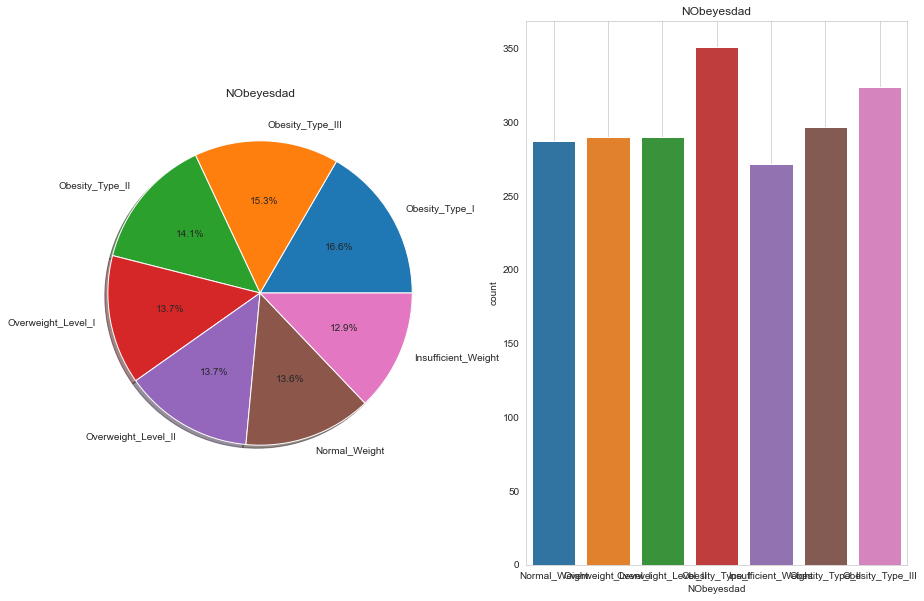

In [43]:
# Increase the width
f,ax=plt.subplots(1,2,figsize=(15,10))
df['NObeyesdad'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('NObeyesdad')
ax[0].set_ylabel('')
sns.countplot('NObeyesdad',data=df,ax=ax[1])
ax[1].set_title('NObeyesdad')
plt.grid()
plt.show()

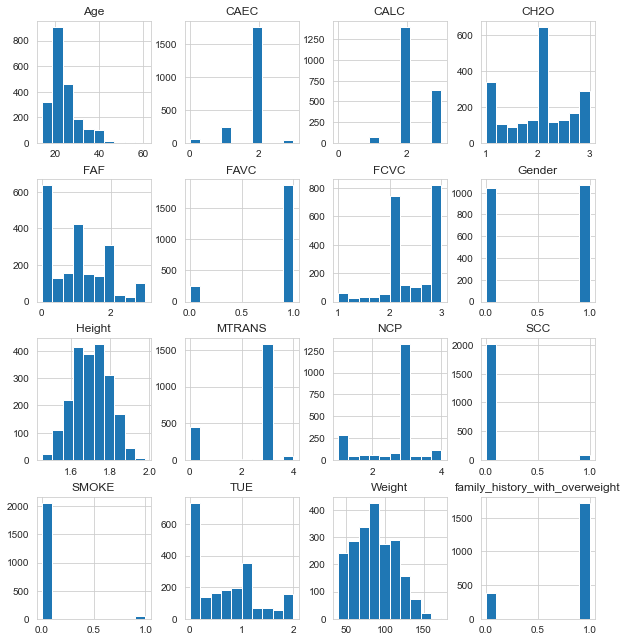

In [45]:
df.hist(bins=10,figsize=(10,11))
plt.show()

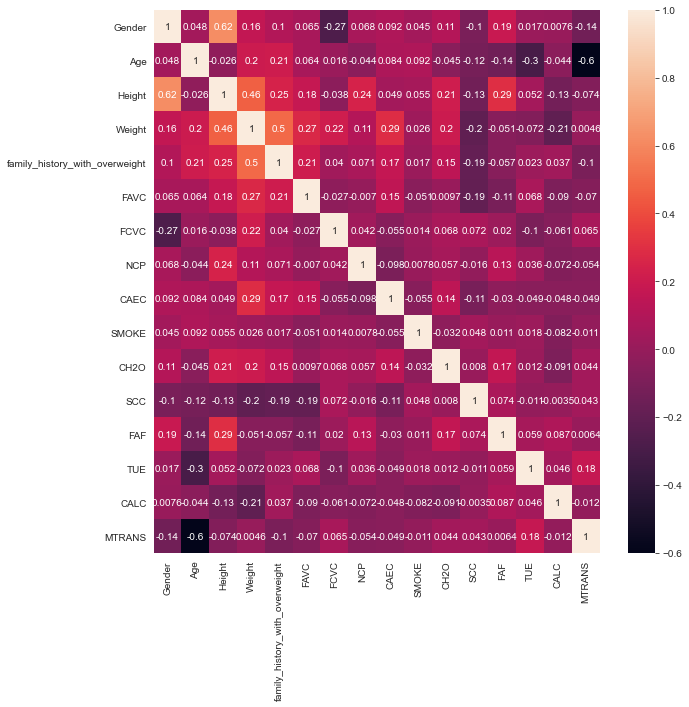

In [47]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

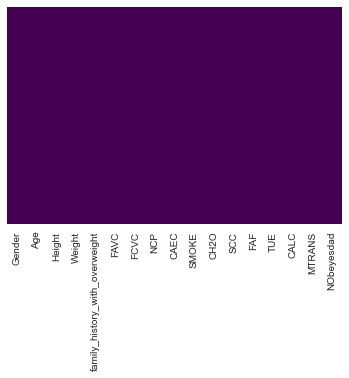

In [50]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [52]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [54]:
y.head()

0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [58]:
X_train.shape

(1688, 16)

In [60]:
y_train.shape

(1688,)

In [61]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,ypredict)
print("Accuracy score of KNN",accuracy)

Accuracy score of KNN 0.8297872340425532


In [66]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,ypredict)
cm

array([[51,  1,  0,  0,  0,  1,  0],
       [15, 24,  6,  2,  0, 11,  6],
       [ 1,  1, 65,  2,  1,  4,  0],
       [ 0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0, 71,  0,  0],
       [ 1,  2,  4,  0,  0, 39,  1],
       [ 1,  1,  2,  4,  0,  4, 50]], dtype=int64)

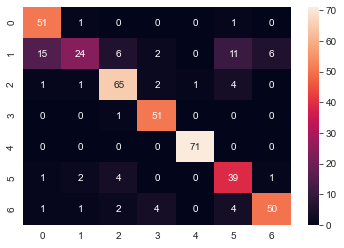

In [68]:
sns.heatmap(confusion_matrix(y_test,ypredict),annot=True,fmt='d')

In [70]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\sohail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("Accuracy score of Logistic Regression",accuracy)

Accuracy score of Logistic Regression 0.8936170212765957


In [73]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("Accuracy score of Decision Tree",accuracy)

Accuracy score of Decision Tree 0.9456264775413712


In [76]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
ypredict = rf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,ypredict)
print("Accuracy score of Random Forest",accuracy)

Accuracy score of Random Forest 0.966903073286052


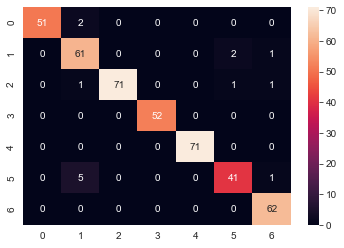

In [80]:
sns.heatmap(confusion_matrix(y_test,ypredict),annot=True,fmt='d')

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypredict))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        53
      Normal_Weight       0.88      0.95      0.92        64
     Obesity_Type_I       1.00      0.96      0.98        74
    Obesity_Type_II       1.00      1.00      1.00        52
   Obesity_Type_III       1.00      1.00      1.00        71
 Overweight_Level_I       0.93      0.87      0.90        47
Overweight_Level_II       0.95      1.00      0.98        62

           accuracy                           0.97       423
          macro avg       0.97      0.96      0.96       423
       weighted avg       0.97      0.97      0.97       423



In [95]:
prediction_output =pd.DataFrame(data=[y_test.values,predictions],index=['y_test','ypredict'])
prediction_output.transpose()

,y_test,ypredict
0,Obesity_Type_II,Obesity_Type_II
1,Obesity_Type_III,Obesity_Type_III
2,Obesity_Type_III,Obesity_Type_III
3,Normal_Weight,Normal_Weight
4,Overweight_Level_I,Overweight_Level_I
...,...,...
418,Obesity_Type_III,Obesity_Type_III
419,Overweight_Level_II,Overweight_Level_II
420,Insufficient_Weight,Insufficient_Weight
421,Normal_Weight,Normal_Weight


In [103]:
prediction_output.T.to_csv('Tested_Predicted.csv')

In [105]:
#Support Vector Machine
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
predictions = sv.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("Accuracy score of SVM",accuracy)

Accuracy score of SVM 0.900709219858156
